In [2]:
#pip install statsmodels
#pip install matplotlib

In [51]:
import pandas as pd # import pandas library to work with DataFrames
import numpy as np # import numpy library to work with numerical python funcitons such as sqrt and mean
import statsmodels.api as sm # import statsmodels.api library to work with time series

import warnings 
warnings.filterwarnings("ignore") # We would like to ignore warnings for now

import matplotlib.pyplot as plt # import matplotlib.pyplot library to plot figures
plt.style.use('fivethirtyeight')
#plt.style.use('Solarize_Light2') # you can use this style if you like!

In [61]:
data = pd.read_csv('CS5-train.csv', header=0, index_col=0,parse_dates=True)
data.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [62]:
data.shape

(3000888, 5)

In [63]:
data['family'].value_counts()

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

In [64]:
data.describe()

,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


In [65]:
 # Step 2: Select Store 1 and Product AUTOMOTIVE
selected_store_product = data[(data['store_nbr'] == 1) & (data['family'] == 'AUTOMOTIVE')]
selected_store_product.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1782,2013-01-02,1,AUTOMOTIVE,2.0,0
3564,2013-01-03,1,AUTOMOTIVE,3.0,0
5346,2013-01-04,1,AUTOMOTIVE,3.0,0
7128,2013-01-05,1,AUTOMOTIVE,5.0,0


In [66]:
selected_store_product.shape

(1684, 5)

In [69]:
selected_store_product['date'] = pd.to_datetime(selected_store_product['date'])

# Extract year and month from the date
selected_store_product['year_month'] = selected_store_product['date'].dt.to_period('M')

# Group by year_month and sum sales
monthly_sales = selected_store_product.groupby('year_month')['sales'].sum().reset_index()

# Convert the year_month back to datetime for consistency
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Display the result
#print(monthly_sales)

In [134]:
monthly_sales

,year_month,sales
0,2013-01-01,68.0
1,2013-02-01,38.0
2,2013-03-01,59.0
3,2013-04-01,66.0
4,2013-05-01,79.0
5,2013-06-01,66.0
6,2013-07-01,70.0
7,2013-08-01,98.0
8,2013-09-01,63.0
9,2013-10-01,54.0


In [12]:
filtered_df = monthly_sales[(monthly_sales['year_month'] >= '2013-01-01') & (monthly_sales['year_month'] <= '2016-12-31')]

# Display the filtered data
print(filtered_df)

   year_month  sales
0  2013-01-01   68.0
1  2013-02-01   38.0
2  2013-03-01   59.0
3  2013-04-01   66.0
4  2013-05-01   79.0
5  2013-06-01   66.0
6  2013-07-01   70.0
7  2013-08-01   98.0
8  2013-09-01   63.0
9  2013-10-01   54.0
10 2013-11-01   63.0
11 2013-12-01   57.0
12 2014-01-01   75.0
13 2014-02-01   85.0
14 2014-03-01   97.0
15 2014-04-01   76.0
16 2014-05-01   63.0
17 2014-06-01   65.0
18 2014-07-01  108.0
19 2014-08-01   68.0
20 2014-09-01  101.0
21 2014-10-01   93.0
22 2014-11-01   91.0
23 2014-12-01   97.0
24 2015-01-01   91.0
25 2015-02-01   75.0
26 2015-03-01   91.0
27 2015-04-01   83.0
28 2015-05-01   80.0
29 2015-06-01  103.0
30 2015-07-01   94.0
31 2015-08-01  106.0
32 2015-09-01   93.0
33 2015-10-01  109.0
34 2015-11-01   96.0
35 2015-12-01  130.0
36 2016-01-01  146.0
37 2016-02-01  129.0
38 2016-03-01  168.0
39 2016-04-01  159.0
40 2016-05-01  146.0
41 2016-06-01  123.0
42 2016-07-01  136.0
43 2016-08-01  128.0
44 2016-09-01  109.0
45 2016-10-01  131.0
46 2016-11-01

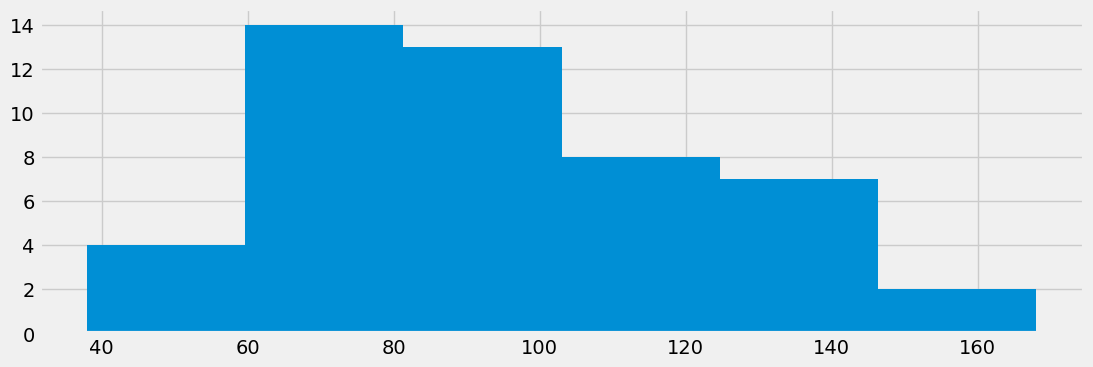

In [75]:
filtered_df['sales'].hist(bins=6,figsize=(12,4)) # plot the histrogram of the demand
plt.show()

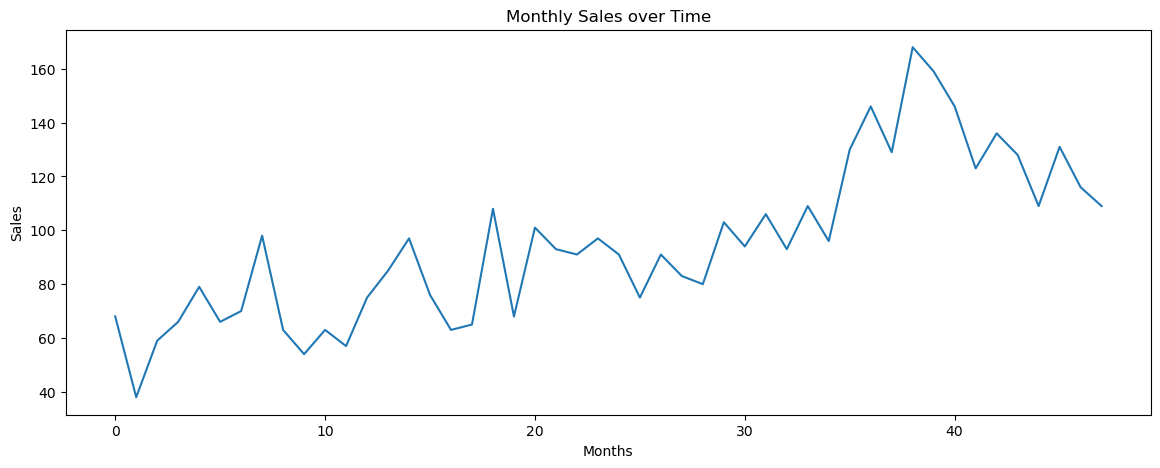

In [13]:
filtered_df['sales'].plot(figsize=(14,5))
#plt.ylim(top=2000)
#plt.ylim(bottom=0)
#plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel("Months")  # Label for the x-axis
plt.ylabel("Sales")   # Label for the y-axis
plt.title("Monthly Sales over Time")
plt.savefig("timeseries_plot1.pdf", dpi=600) # this saves the figure as a pdf file
plt.show()

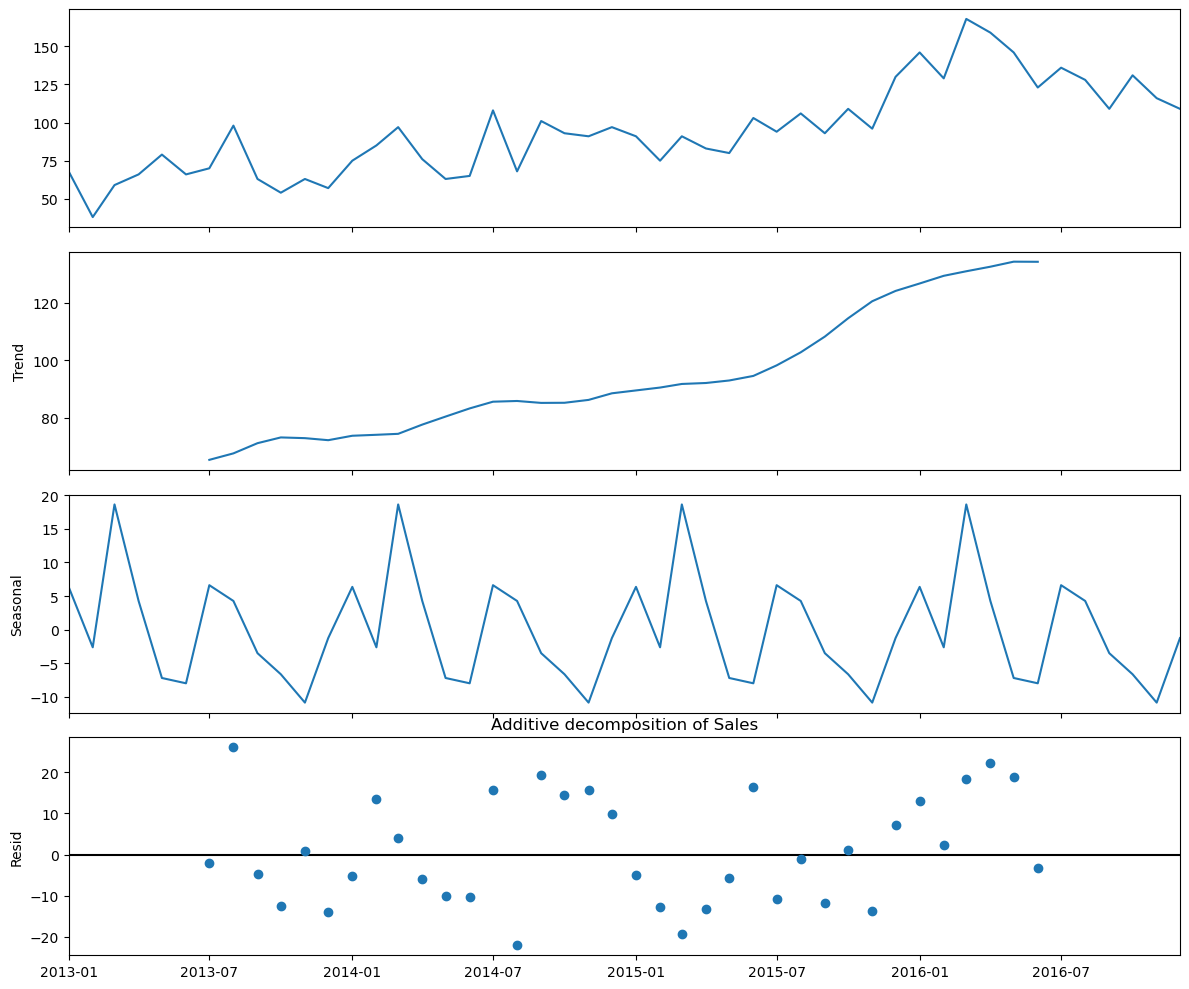

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose # this line imports the seasonal_decompose class from the statsmodels.tsa.seasonal library


filtered_df.set_index('year_month', inplace=True)
result = seasonal_decompose(filtered_df, model='additive')
#result = seasonal_decompose(demand_data, model='multiplicative')


from pylab import rcParams # these two lines adjust the size of the decomposed plots
rcParams['figure.figsize'] = 12, 10

result.plot() # this generates the plot of result

#plt.savefig("demand_decomposed.pdf", dpi=600)
plt.title('Additive decomposition of Sales')
plt.show() # this shows the plot

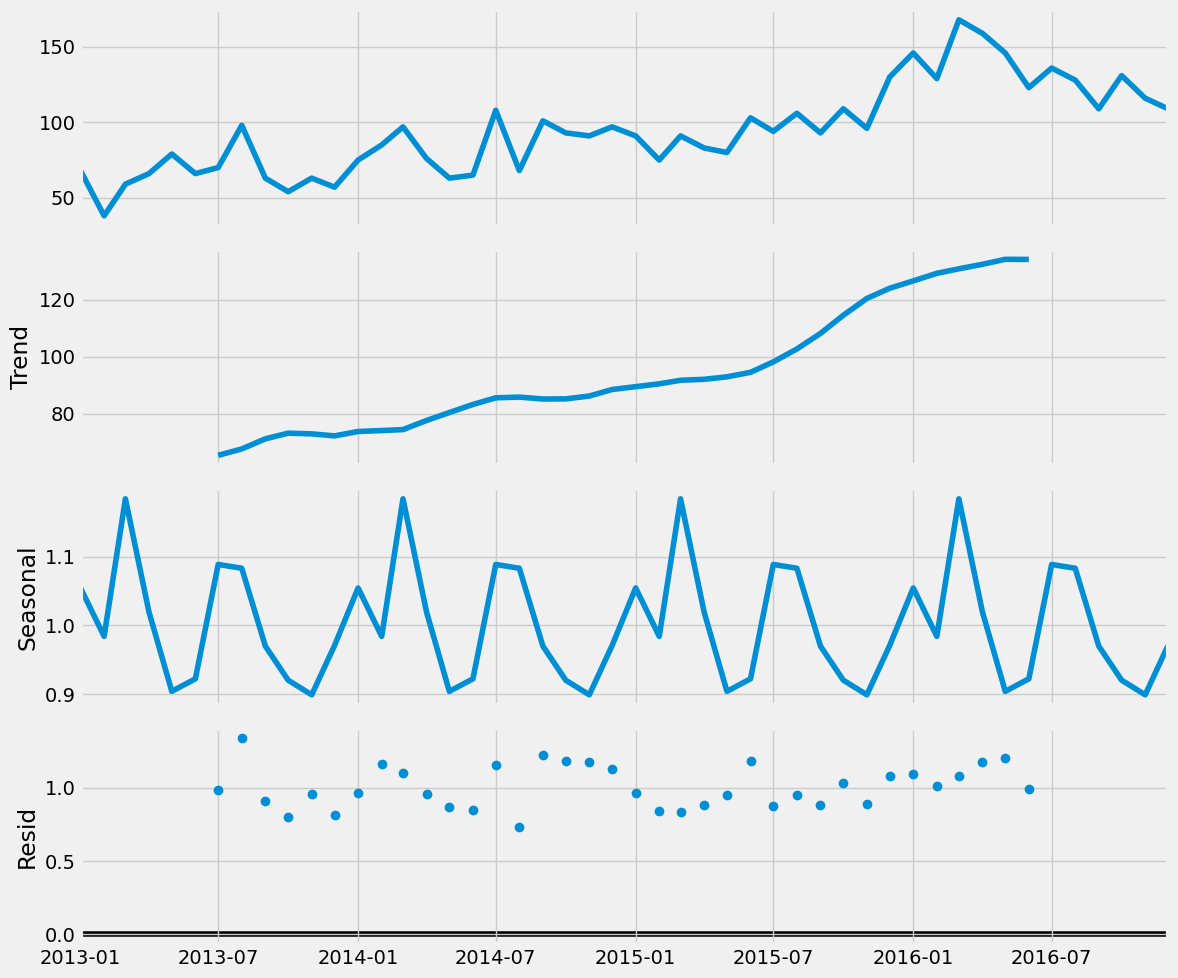

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose # this line imports the seasonal_decompose class from the statsmodels.tsa.seasonal library


#filtered_df.set_index('year_month', inplace=True)
result = seasonal_decompose(filtered_df, model='multiplicative')
#result = seasonal_decompose(demand_data, model='multiplicative')


from pylab import rcParams # these two lines adjust the size of the decomposed plots
rcParams['figure.figsize'] = 12, 10

result.plot() # this generates the plot of result

#plt.savefig("demand_decomposed.pdf", dpi=600)
plt.show() # this shows the plot

In [87]:
#demand_data.rename(columns={"Passengers": "Demand"}, inplace=True)

demand_data_MA = filtered_df.copy() # create a new dataframe to store the forecast values of MA with different W

# below we create three new columns
demand_data_MA['MA2']  = filtered_df.sales.rolling(2).mean().shift() # shift is used to ensure that we use the average to forecast the next period's demand 
demand_data_MA['MA5']  = filtered_df.sales.rolling(5).mean().shift()
demand_data_MA['MA10'] = filtered_df.sales.rolling(10).mean().shift()


In [193]:
demand_data_MA.head(15)

,sales,MA2,MA5,MA10
year_month,,,,
2013-01-01,68.0,NaN,NaN,NaN
2013-02-01,38.0,NaN,NaN,NaN
2013-03-01,59.0,53.0,NaN,NaN
2013-04-01,66.0,48.5,NaN,NaN
2013-05-01,79.0,62.5,NaN,NaN
2013-06-01,66.0,72.5,62.0,NaN
2013-07-01,70.0,72.5,61.6,NaN
2013-08-01,98.0,68.0,68.0,NaN
2013-09-01,63.0,84.0,75.8,NaN


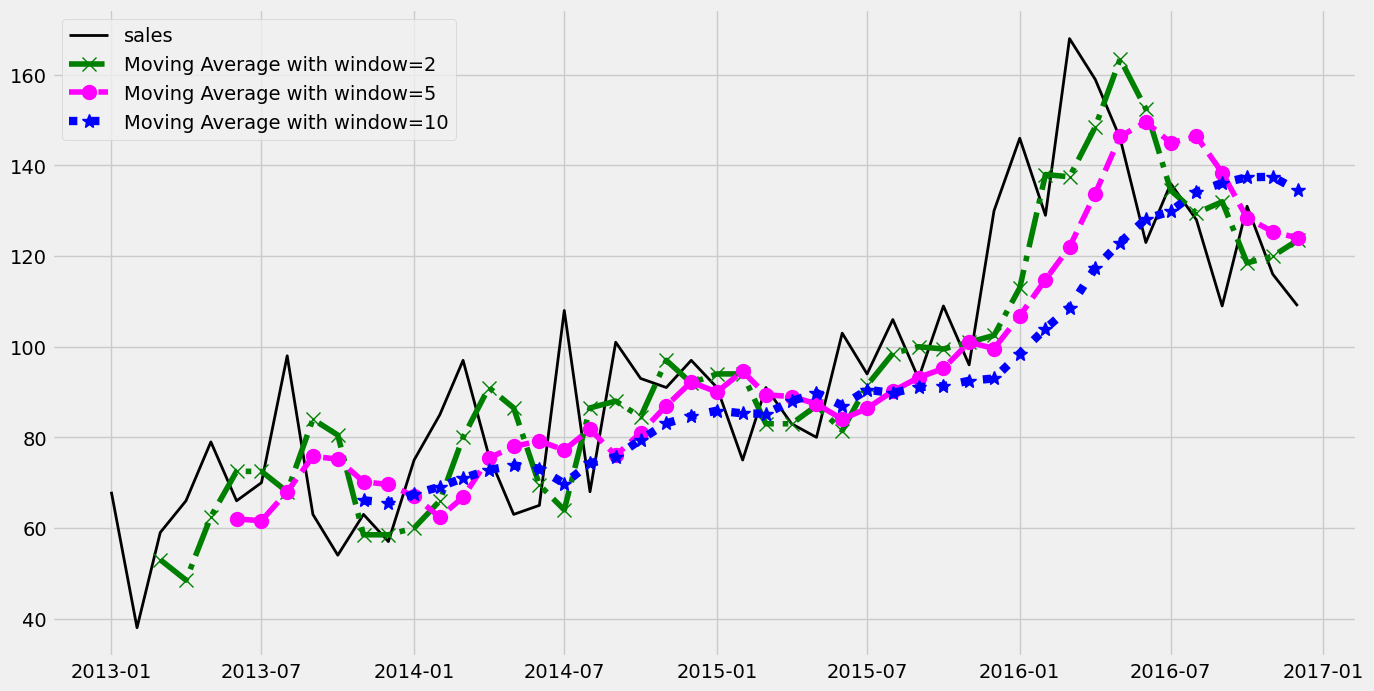

In [88]:
plt.figure(figsize=(15,8))
plt.grid(True)

plt.plot(demand_data_MA['sales'],label='sales', color='black',linewidth=2)
plt.plot(demand_data_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(demand_data_MA['MA5'],label='Moving Average with window=5',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(demand_data_MA['MA10'],label='Moving Average with window=10',marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)

plt.legend(loc=2)
plt.show()

In [92]:

# Reset index to access 'year_month' as a column
filtered_df = filtered_df.reset_index()

# Extract year and month as separate columns
filtered_df['Year'] = filtered_df['year_month'].dt.year
filtered_df['Month'] = filtered_df['year_month'].dt.strftime('%b')  # Get month as abbreviated string (Jan, Feb, etc.)

# Pivot the data to reshape it with 'Month' as rows and 'Year' as columns
sales_table = filtered_df.pivot(index='Month', columns='Year', values='sales')

# Reorder the index to ensure months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_table = sales_table.reindex(month_order)

# Display the resulting table
print(sales_table)


Year   2013   2014   2015   2016
Month                           
Jan    68.0   75.0   91.0  146.0
Feb    38.0   85.0   75.0  129.0
Mar    59.0   97.0   91.0  168.0
Apr    66.0   76.0   83.0  159.0
May    79.0   63.0   80.0  146.0
Jun    66.0   65.0  103.0  123.0
Jul    70.0  108.0   94.0  136.0
Aug    98.0   68.0  106.0  128.0
Sep    63.0  101.0   93.0  109.0
Oct    54.0   93.0  109.0  131.0
Nov    63.0   91.0   96.0  116.0
Dec    57.0   97.0  130.0  109.0


In [95]:
import pandas as pd

# Assuming `demand_table` is the pivoted table with months as index and years (2013 to 2016) as columns

# Step 1: Calculate the monthly average across the years (2013 to 2016)
sales_table["average"] = sales_table.mean(axis=1)

# Step 2: Calculate the overall average across all months and years
# Flattening all values from 2013 to 2016 to calculate the global average
average_all = sales_table.loc[:, 2013:2016].values.flatten().mean()

# Step 3: Calculate the seasonal index (S Index) for each month
sales_table["S Index"] = sales_table["average"] / average_all

# Display the demand table with seasonal indices
print(sales_table)


Year   2013   2014   2015   2016    average   S Index
Month                                                
Jan    68.0   75.0   91.0  146.0  79.333663  0.836743
Feb    38.0   85.0   75.0  129.0  68.268705  0.720039
Mar    59.0   97.0   91.0  168.0  86.640711  0.913811
Apr    66.0   76.0   83.0  159.0  80.168754  0.845550
May    79.0   63.0   80.0  146.0  76.828389  0.810319
Jun    66.0   65.0  103.0  123.0  74.531889  0.786098
Jul    70.0  108.0   94.0  136.0  85.179301  0.898397
Aug    98.0   68.0  106.0  128.0  83.509119  0.880782
Sep    63.0  101.0   93.0  109.0  76.410844  0.805915
Oct    54.0   93.0  109.0  131.0  80.795073  0.852156
Nov    63.0   91.0   96.0  116.0  76.410844  0.805915
Dec    57.0   97.0  130.0  109.0  82.047709  0.865368


In [96]:
print(sales_table["S Index"].sum())

10.021094264996705


In [100]:
sales_table.columns

Index([2013, 2014, 2015, 2016, 'average', 'S Index'], dtype='object', name='Year')

In [102]:
sales_table["deseason 2013"] = sales_table[2013]/sales_table["S Index"]
sales_table["deseason 2014"] = sales_table[2014]/sales_table["S Index"]
sales_table["deseason 2015"] = sales_table[2015]/sales_table["S Index"]
sales_table["deseason 2016"] = sales_table[2016]/sales_table["S Index"]

sales_table

Year,2013,2014,2015,2016,average,S Index,deseason 2013,deseason 2014,deseason 2015,deseason 2016
Month,,,,,,,,,,
Jan,68.0,75.0,91.0,146.0,79.333663,0.836743,81.267520,89.633294,108.755063,174.486145
Feb,38.0,85.0,75.0,129.0,68.268705,0.720039,52.774914,118.049149,104.161014,179.156944
Mar,59.0,97.0,91.0,168.0,86.640711,0.913811,64.564769,106.148858,99.582949,183.845445
Apr,66.0,76.0,83.0,159.0,80.168754,0.845550,78.055660,89.882275,98.160906,188.043180
May,79.0,63.0,80.0,146.0,76.828389,0.810319,97.492445,77.747139,98.726526,180.175910
Jun,66.0,65.0,103.0,123.0,74.531889,0.786098,83.959029,82.686923,131.026970,156.469100
Jul,70.0,108.0,94.0,136.0,85.179301,0.898397,77.916523,120.214064,104.630760,151.380674
Aug,98.0,68.0,106.0,128.0,83.509119,0.880782,111.264795,77.204144,120.347636,145.325447
Sep,63.0,101.0,93.0,109.0,76.410844,0.805915,78.171987,125.323345,115.396743,135.249946


In [119]:
deseason_sales_data

,year_month,deseason_sales,Year,Month
3,2013-04-01,66.0,2013,Apr
4,2013-05-01,79.0,2013,May
5,2013-06-01,66.0,2013,Jun
6,2013-07-01,70.0,2013,Jul
7,2013-08-01,98.0,2013,Aug
8,2013-09-01,63.0,2013,Sep
9,2013-10-01,54.0,2013,Oct
10,2013-11-01,63.0,2013,Nov
11,2013-12-01,57.0,2013,Dec
12,2014-01-01,75.0,2014,Jan


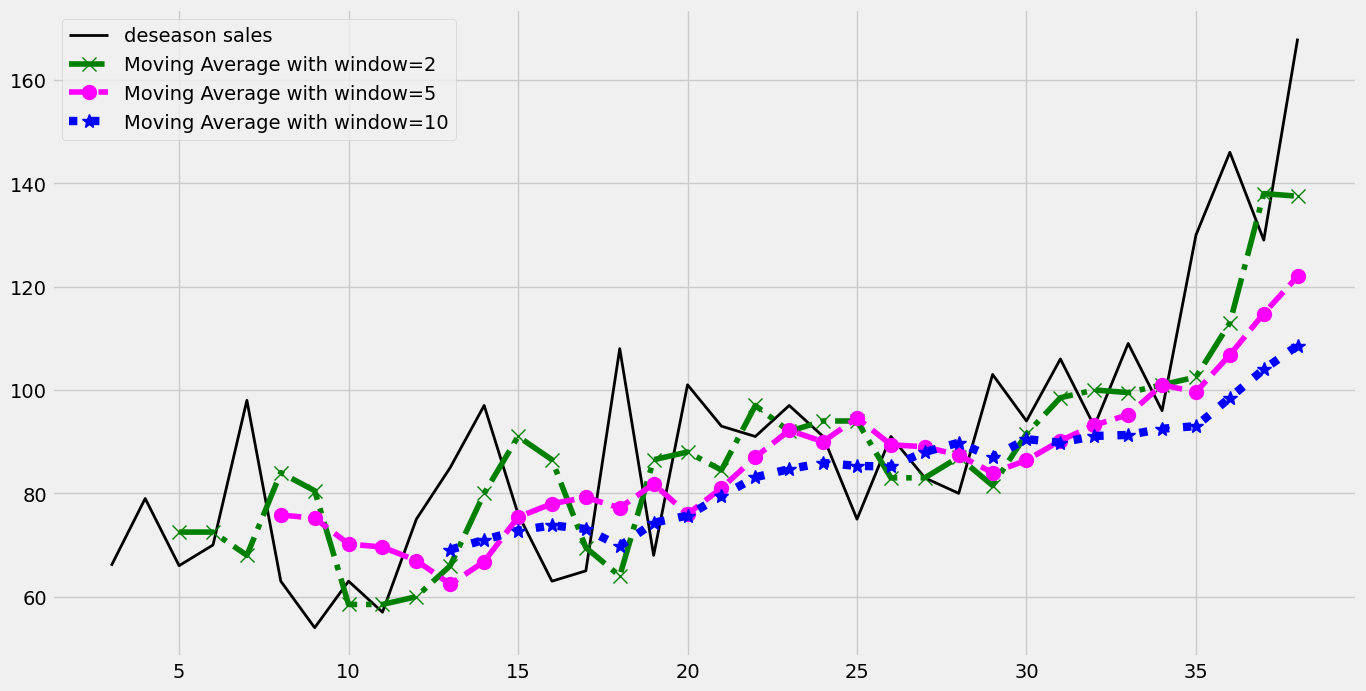

In [121]:
deseason_sales_data_MA = deseason_sales_data.copy()
deseason_sales_data_MA['MA2'] = deseason_sales_data.deseason_sales.rolling(2).mean().shift()
deseason_sales_data_MA['MA5'] = deseason_sales_data.deseason_sales.rolling(5).mean().shift()
deseason_sales_data_MA['MA10'] = deseason_sales_data.deseason_sales.rolling(10).mean().shift()

plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(deseason_sales_data_MA['deseason_sales'],label='deseason sales', color='black',linewidth=2)
plt.plot(deseason_sales_data_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(deseason_sales_data_MA['MA5'],label='Moving Average with window=5',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(deseason_sales_data_MA['MA10'],label='Moving Average with window=10',marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.legend(loc=2)
plt.show()

In [122]:
pred = deseason_sales_data_MA.iloc[12:]

MAD_MA2 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA2'].values))
MAD_MA5 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA5'].values))
MAD_MA10 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA10'].values))

print("MAD score for Moving average with Window size 2 is {:0.1f}\nMAD score for Moving average with Window size 5 is {:0.1f}\nMAD score for Moving average with Window size 10 is {:0.1f}".format(MAD_MA2,MAD_MA5,MAD_MA10))

MAD score for Moving average with Window size 2 is 13.7
MAD score for Moving average with Window size 5 is 14.5
MAD score for Moving average with Window size 10 is 16.2


In [125]:
monthly_sales

,year_month,sales
0,2013-01-01,68.0
1,2013-02-01,38.0
2,2013-03-01,59.0
3,2013-04-01,66.0
4,2013-05-01,79.0
5,2013-06-01,66.0
6,2013-07-01,70.0
7,2013-08-01,98.0
8,2013-09-01,63.0
9,2013-10-01,54.0


In [124]:
filtered_df1 = monthly_sales[(monthly_sales['year_month'] >= '2017-01-01')]
# Display the filtered data
print(filtered_df1)

   year_month  sales
48 2017-01-01  107.0
49 2017-02-01   98.0
50 2017-03-01  118.0
51 2017-04-01  137.0
52 2017-05-01  108.0
53 2017-06-01  138.0
54 2017-07-01  147.0
55 2017-08-01   71.0


In [127]:
filtered_df1

,year_month,sales
48,2017-01-01,107.0
49,2017-02-01,98.0
50,2017-03-01,118.0
51,2017-04-01,137.0
52,2017-05-01,108.0
53,2017-06-01,138.0
54,2017-07-01,147.0
55,2017-08-01,71.0


In [130]:
MA2_forecasted_deseason_sales = deseason_sales_data["deseason_sales"][-2:].mean()

MA2_forecasted_sales = filtered_df1.iloc[-8:,:]
MA2_forecasted_sales.rename(columns={"sales": "Forecasted sales"}, inplace=True)

a = MA2_forecasted_deseason_sales*sales_table["S Index"][0:8]
MA2_forecasted_sales["Forecasted sales"] = list(a)


MA2_forecasted_sales 

,year_month,Forecasted sales
48,2017-01-01,124.256284
49,2017-02-01,106.925802
50,2017-03-01,135.700942
51,2017-04-01,125.564245
52,2017-05-01,120.332402
53,2017-06-01,116.735509
54,2017-07-01,133.412010
55,2017-08-01,130.796089


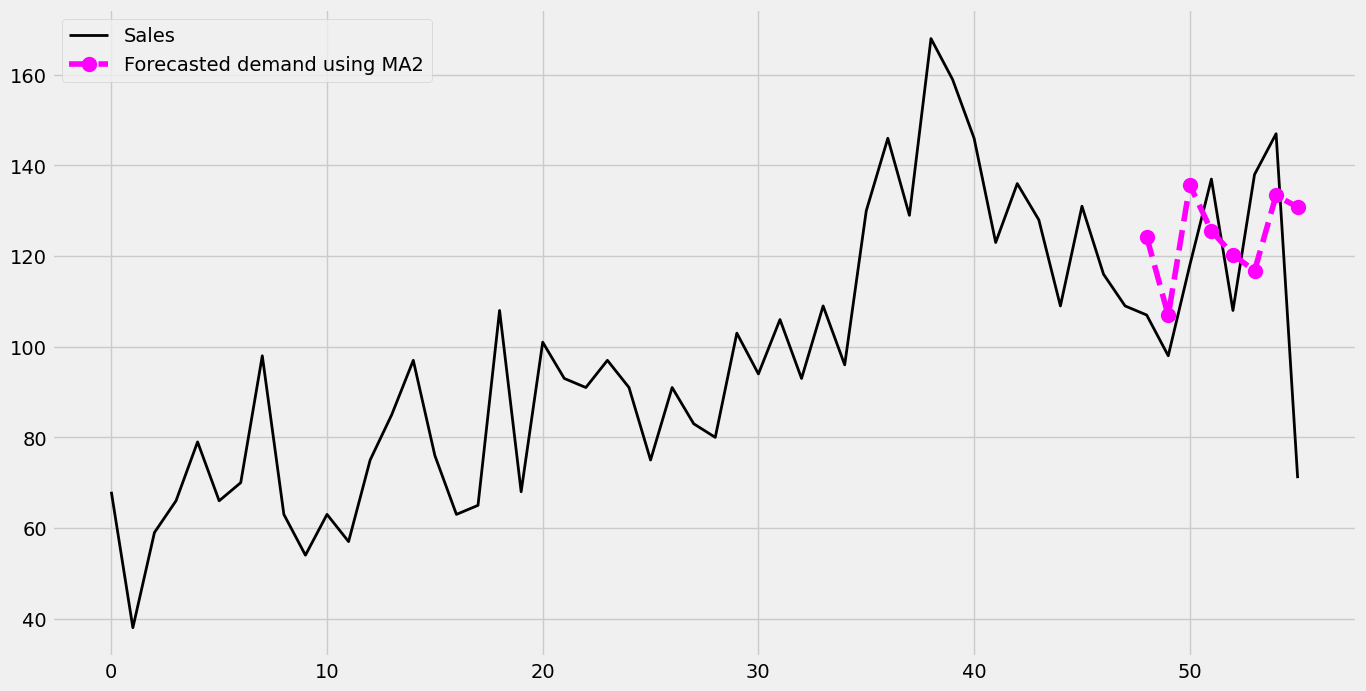

In [135]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(monthly_sales['sales'],label='Sales', color='black',linewidth=2)
plt.plot(MA2_forecasted_sales["Forecasted sales"],label='Forecasted demand using MA2',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2)
plt.show()

In [137]:
MAD_MA2 = np.mean(np.absolute(MA2_forecasted_sales["Forecasted sales"].values - monthly_sales['sales'][-8:].values))
MAD_MA2

20.287469272655454

## Exponential smoothing (ES) technique

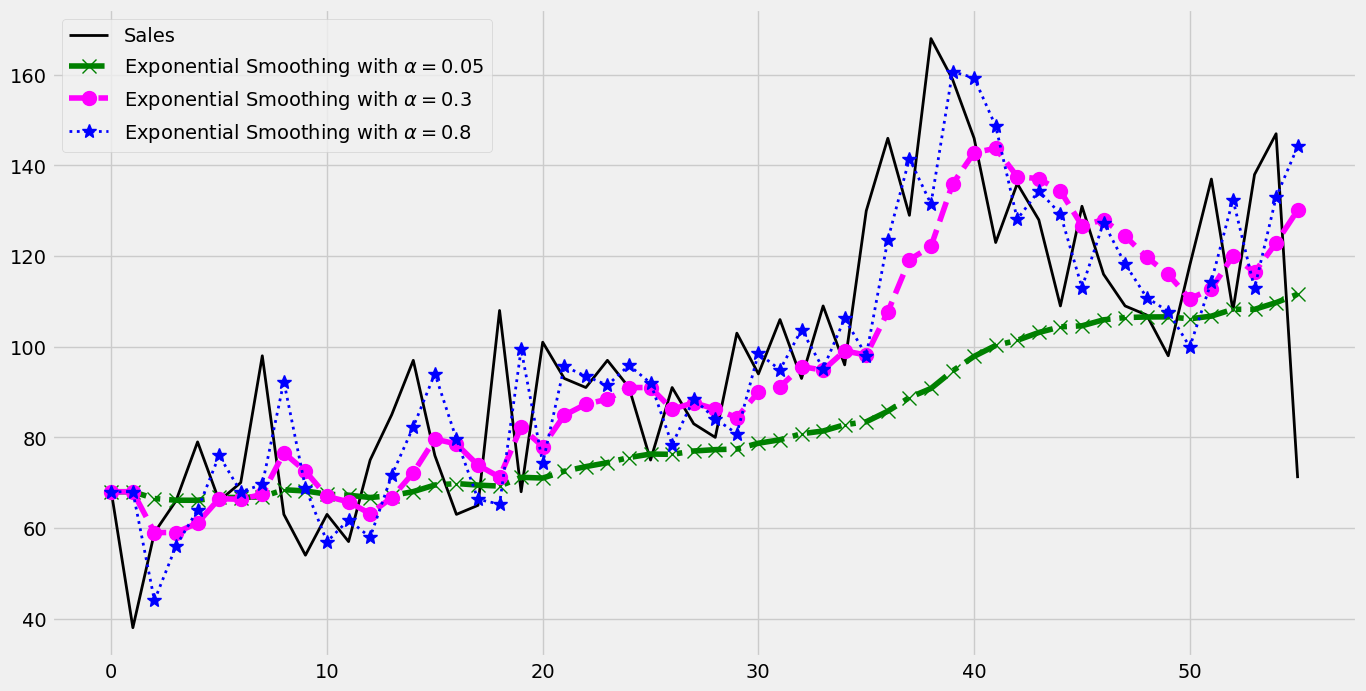

In [147]:

# Ensure that 'monthly_sales' contains numeric data only
monthly_sales['sales'] = pd.to_numeric(monthly_sales['sales'], errors='coerce')

# Drop any rows with NaN values in 'sales' column
monthly_sales = monthly_sales.dropna(subset=['sales'])

plt.figure(figsize=(15, 8))
plt.grid(True)

# Plot original sales data
plt.plot(monthly_sales['sales'], label='Sales', color='black', linewidth=2)

# Fit Simple Exponential Smoothing models with different smoothing levels
ES1 = SimpleExpSmoothing(monthly_sales['sales']).fit(smoothing_level=0.05, optimized=False)
ES1.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=0.05$', marker='x', markersize=10, linestyle='dashdot', color='green')

ES2 = SimpleExpSmoothing(monthly_sales['sales']).fit(smoothing_level=0.3, optimized=False)
ES2.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=0.3$', marker='o', markersize=10, linestyle='dashed', color='magenta')

ES3 = SimpleExpSmoothing(monthly_sales['sales']).fit(smoothing_level=0.8, optimized=False)
ES3.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=0.8$', marker='*', markersize=10, linestyle='dotted', color='blue', linewidth=2)

# Show the legend and plot
plt.legend(loc=2)
plt.show()


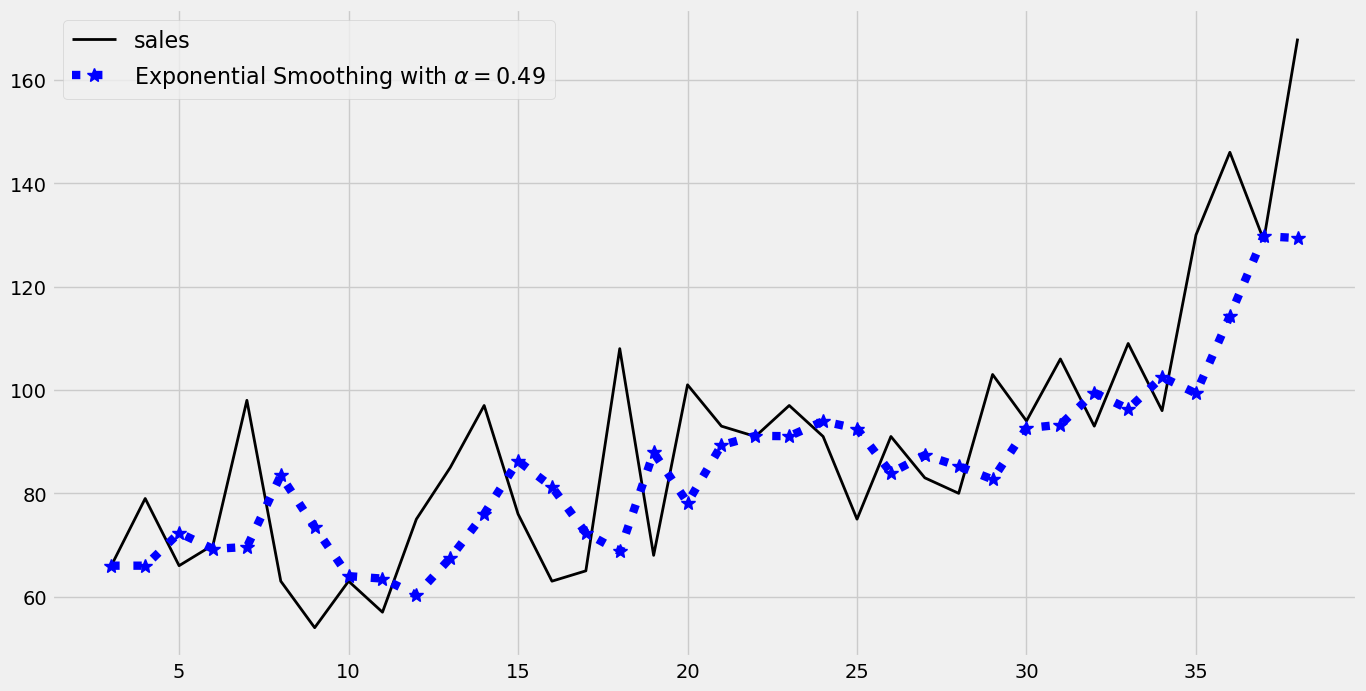

In [150]:
# Ensure 'deseason_sales' column is numeric
deseason_sales_data['deseason_sales'] = pd.to_numeric(deseason_sales_data['deseason_sales'], errors='coerce')

# Drop any NaN values to prevent issues in the model
deseason_sales_data = deseason_sales_data.dropna(subset=['deseason_sales'])

plt.figure(figsize=(15, 8))
plt.grid(True)

# Plot original deseasoned sales data
plt.plot(deseason_sales_data['deseason_sales'], label='sales', color='black', linewidth=2)

# Fit the best Simple Exponential Smoothing model
ES_best = SimpleExpSmoothing(deseason_sales_data['deseason_sales']).fit()  # Automatically finds the best alpha
best_alpha = ES_best.model.params['smoothing_level']

# Plot the fitted values
ES_best.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=${:0.2f}'.format(best_alpha), 
                          marker='*', markersize=10, linestyle='dotted', color='blue', linewidth=6)

# Display the legend and plot
plt.legend(loc=2, prop={'size': 16})
plt.show()

In [156]:
ES_forecasted_sales = monthly_sales.iloc[-9:,:]
ES_forecasted_sales.rename(columns={"sales": "Forecasted sales"}, inplace=True)


ES_forecasted_deseason_sales = ES_best.forecast()

b = ES_forecasted_deseason_sales.values[0]*sales_table["S Index"][0:9]
ES_forecasted_sales["Forecasted sales"] = list(b)

ES_forecasted_sales 

,year_month,Forecasted sales
47,2016-12-01,124.033815
48,2017-01-01,106.734362
49,2017-02-01,135.457982
50,2017-03-01,125.339434
51,2017-04-01,120.116958
52,2017-05-01,116.526505
53,2017-06-01,133.173149
54,2017-07-01,130.561911
55,2017-08-01,119.464148


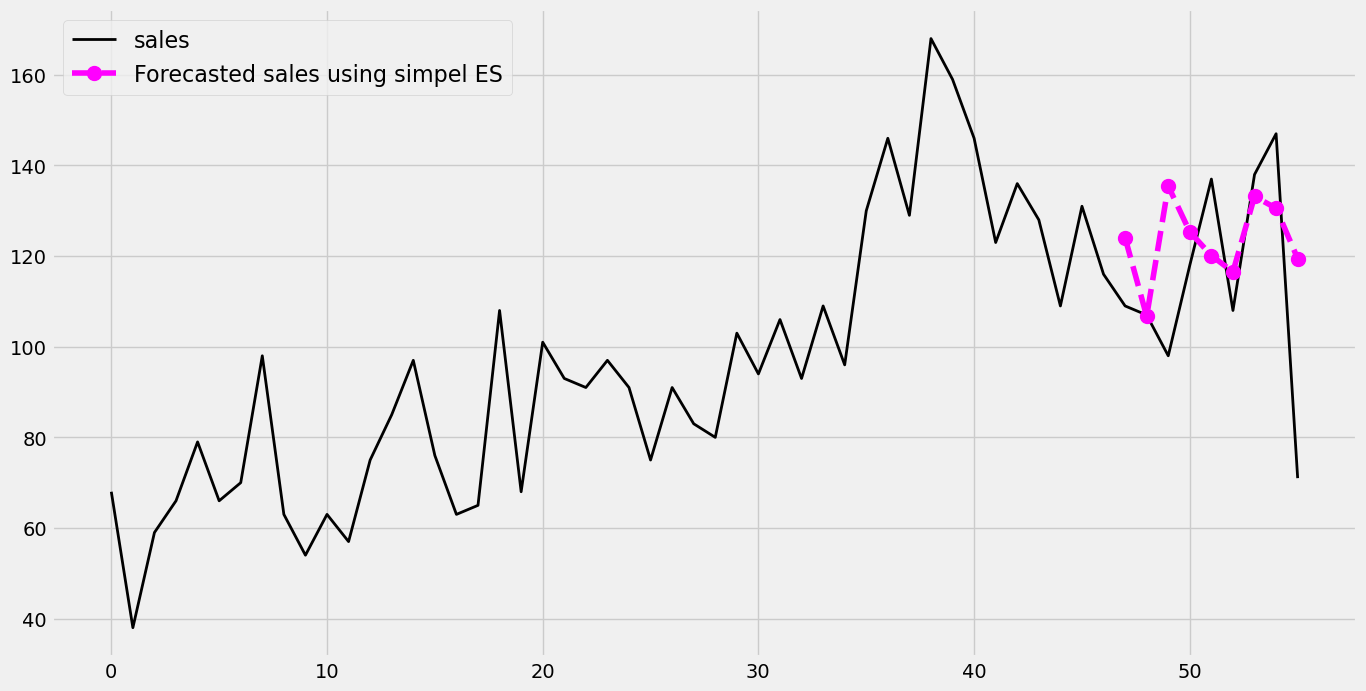

In [157]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(monthly_sales['sales'],label='sales', color='black',linewidth=2)
plt.plot(ES_forecasted_sales["Forecasted sales"],label='Forecasted sales using simpel ES',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

In [161]:
MAD_ES = np.mean(np.absolute(ES_forecasted_sales["Forecasted sales"].values - monthly_sales['sales'][-9:].values))
round(MAD_ES,2)

17.25

## Holt-Winters Exponential Smoothing (HWES) method


In [174]:
monthly_sales

,year_month,sales
0,2013-01-01,68.0
1,2013-02-01,38.0
2,2013-03-01,59.0
3,2013-04-01,66.0
4,2013-05-01,79.0
5,2013-06-01,66.0
6,2013-07-01,70.0
7,2013-08-01,98.0
8,2013-09-01,63.0
9,2013-10-01,54.0


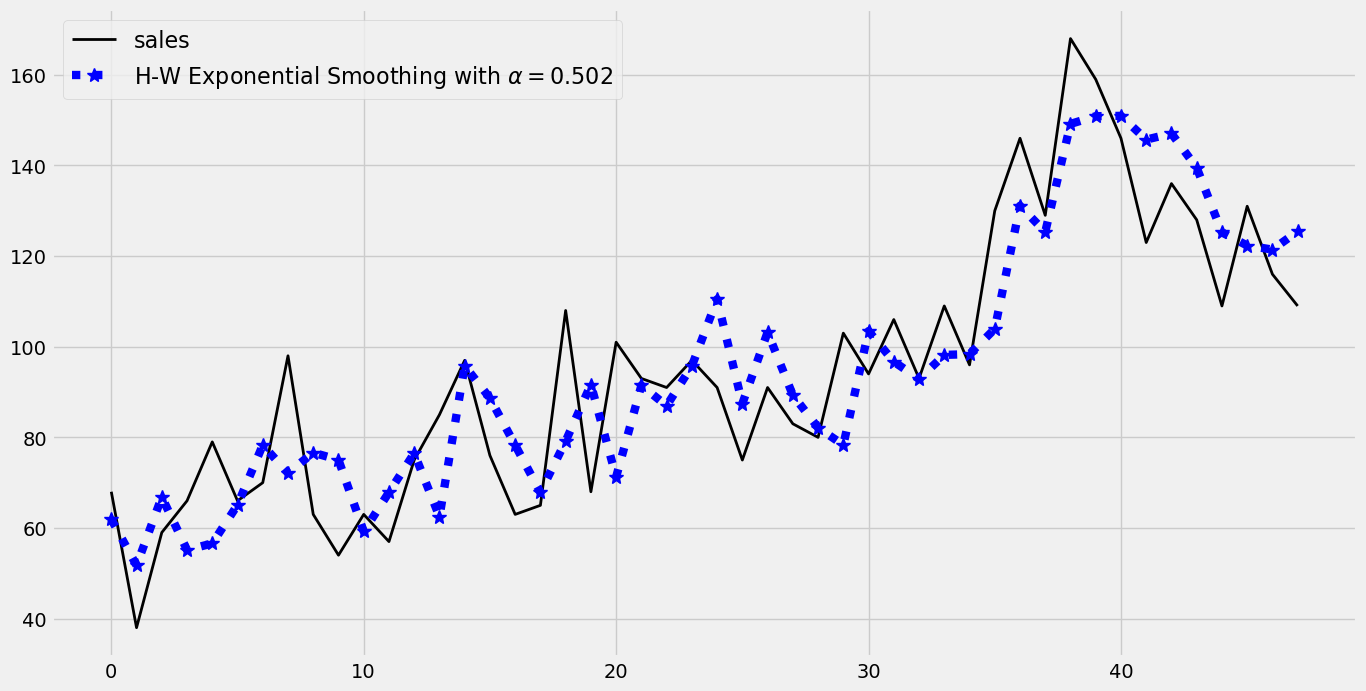

In [175]:
plt.figure(figsize=(15,8))
plt.grid(True)

train_data = filtered_df['sales']
plt.plot(train_data ,label='sales', color='black',linewidth=2)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

H_W_model = ExponentialSmoothing(train_data.astype(float), trend="add", seasonal="add", seasonal_periods=12)

H_W_fit = H_W_model.fit()

best_H_W_alpha = H_W_fit.model.params['smoothing_level']

H_W_fit.fittedvalues.plot(label=r'H-W Exponential Smoothing with $\alpha=%0.3f$'%best_H_W_alpha,
                          marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.legend(loc=2,prop={'size': 16})


plt.show()

In [176]:
filtered_df1

,year_month,sales
48,2017-01-01,107.0
49,2017-02-01,98.0
50,2017-03-01,118.0
51,2017-04-01,137.0
52,2017-05-01,108.0
53,2017-06-01,138.0
54,2017-07-01,147.0
55,2017-08-01,71.0


In [182]:
HES_forecasted_demand = filtered_df1.iloc[-8:,:]
#HES_forecasted_demand.rename(columns={"sales": "Forecasted sales"}, inplace=True)

HES_forecasted_demand["Forecasted_sales"] = H_W_fit.forecast(8)
HES_forecasted_demand

#HES_forecasted_demand[['year_month','Forecasted_sales']] 

,year_month,sales,Forecasted_sales
48,2017-01-01,107.0,131.283683
49,2017-02-01,98.0,118.033486
50,2017-03-01,118.0,140.032562
51,2017-04-01,137.0,132.280176
52,2017-05-01,108.0,128.278513
53,2017-06-01,138.0,125.523124
54,2017-07-01,147.0,138.272535
55,2017-08-01,71.0,136.275230


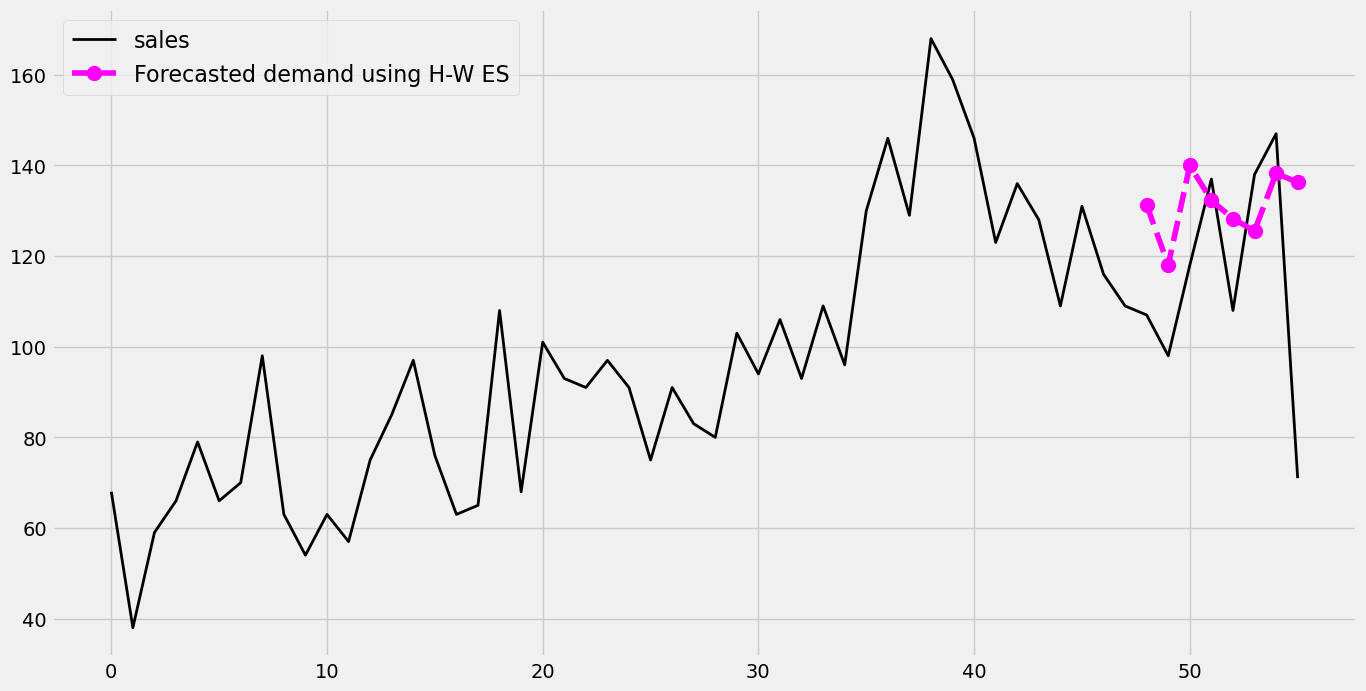

In [183]:
plt.figure(figsize=(15,8))
plt.grid(True)

plt.plot(monthly_sales['sales'], label='sales', color='black',linewidth=2)
plt.plot(HES_forecasted_demand["Forecasted_sales"],label='Forecasted demand using H-W ES',
         marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

In [187]:
MAD_HES = np.mean(np.absolute(HES_forecasted_demand["Forecasted_sales"].values - monthly_sales['sales'][-8:].values))
round(MAD_HES,2)

22.23

In [192]:
# Ensure that 'monthly_sales' contains numeric data only
monthly_sales['sales'] = pd.to_numeric(monthly_sales['sales'], errors='coerce')

# Drop any rows with NaN values in 'sales' column
monthly_sales = monthly_sales.dropna(subset=['sales'])

from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_final = monthly_sales['sales']
model_final = ExponentialSmoothing(train_final, trend="add", seasonal="add", seasonal_periods=12)

fit_final = model_final.fit()
round(fit_final.forecast(3),1)

56    100.1
57    105.4
58    100.1
dtype: float64

/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/639844622.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('CS5-train.csv', header=0, index_col=0, parse_dates=True)


            sales   MA2   MA5  MA10
year_month                         
2013-01-01   68.0   NaN   NaN   NaN
2013-02-01   38.0  53.0   NaN   NaN
2013-03-01   59.0  48.5   NaN   NaN
2013-04-01   66.0  62.5   NaN   NaN
2013-05-01   79.0  72.5  62.0   NaN
2013-06-01   66.0  72.5  61.6   NaN
2013-07-01   70.0  68.0  68.0   NaN
2013-08-01   98.0  84.0  75.8   NaN
2013-09-01   63.0  80.5  75.2   NaN
2013-10-01   54.0  58.5  70.2  66.1
2013-11-01   63.0  58.5  69.6  65.6
2013-12-01   57.0  60.0  67.0  67.5
2014-01-01   75.0  66.0  62.4  69.1
2014-02-01   85.0  80.0  66.8  71.0
2014-03-01   97.0  91.0  75.4  72.8


/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/639844622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_store_product['date'] = pd.to_datetime(selected_store_product['date'])
/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/639844622.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_store_product['year_month'] = selected_store_product['date'].dt.to_period('M')
/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/639844622.py:19: SettingWit

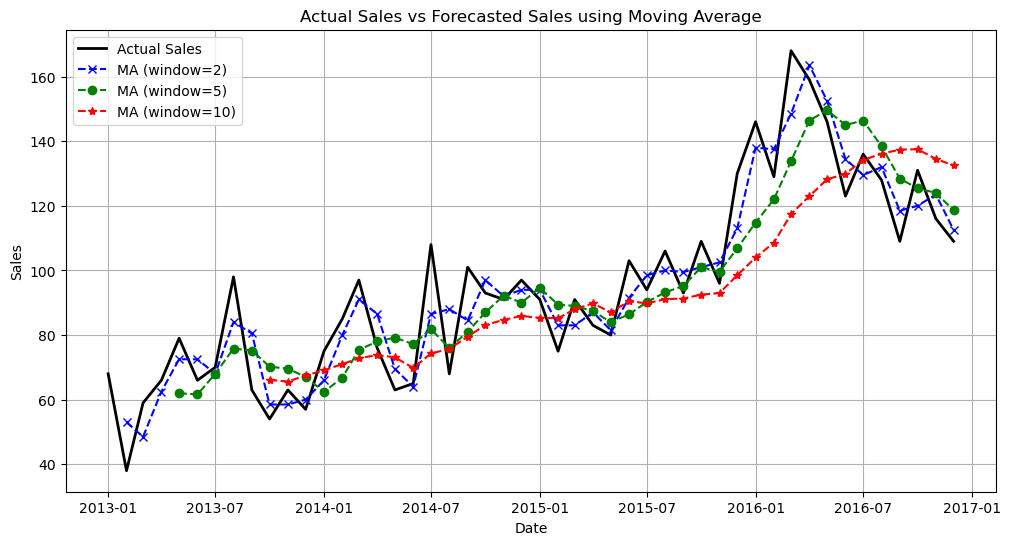

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (make sure 'CS5-train.csv' is in the same directory)
data = pd.read_csv('CS5-train.csv', header=0, index_col=0, parse_dates=True)

# Filter data for Store 1 and Automotive family, aggregate monthly, and set date format.
selected_store_product = data[(data['store_nbr'] == 1) & (data['family'] == 'AUTOMOTIVE')]
selected_store_product['date'] = pd.to_datetime(selected_store_product['date'])
selected_store_product['year_month'] = selected_store_product['date'].dt.to_period('M')
monthly_sales = selected_store_product.groupby('year_month')['sales'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Filtering data for the period from 2013-01-01 to 2016-12-31 for training
filtered_df = monthly_sales[(monthly_sales['year_month'] >= '2013-01-01') & (monthly_sales['year_month'] <= '2016-12-31')]
filtered_df.set_index('year_month', inplace=True)

# Applying Moving Averages with window sizes of 2, 5, and 10
filtered_df['MA2'] = filtered_df['sales'].rolling(window=2).mean()
filtered_df['MA5'] = filtered_df['sales'].rolling(window=5).mean()
filtered_df['MA10'] = filtered_df['sales'].rolling(window=10).mean()

# Display the table with actual sales and MA values
print(filtered_df[['sales', 'MA2', 'MA5', 'MA10']].head(15))  # Adjust head() if you want to see more rows

# Plotting actual sales and forecasted sales using different MA windows
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['sales'], label='Actual Sales', color='black', linewidth=2)
plt.plot(filtered_df['MA2'], label='MA (window=2)', linestyle='--', color='blue', marker='x')
plt.plot(filtered_df['MA5'], label='MA (window=5)', linestyle='--', color='green', marker='o')
plt.plot(filtered_df['MA10'], label='MA (window=10)', linestyle='--', color='red', marker='*')

# Adding plot labels and legend
plt.title('Actual Sales vs Forecasted Sales using Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()


/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/1083198444.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('CS5-train.csv', header=0, index_col=0, parse_dates=True)


MAD for SES (alpha=0.05): 19.76
MAD for SES (alpha=0.3): 13.36
MAD for SES (alpha=0.8): 14.42


/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/1083198444.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_store_product['date'] = pd.to_datetime(selected_store_product['date'])
/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/1083198444.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_store_product['year_month'] = selected_store_product['date'].dt.to_period('M')
/Users/mittapallymahendhar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/t

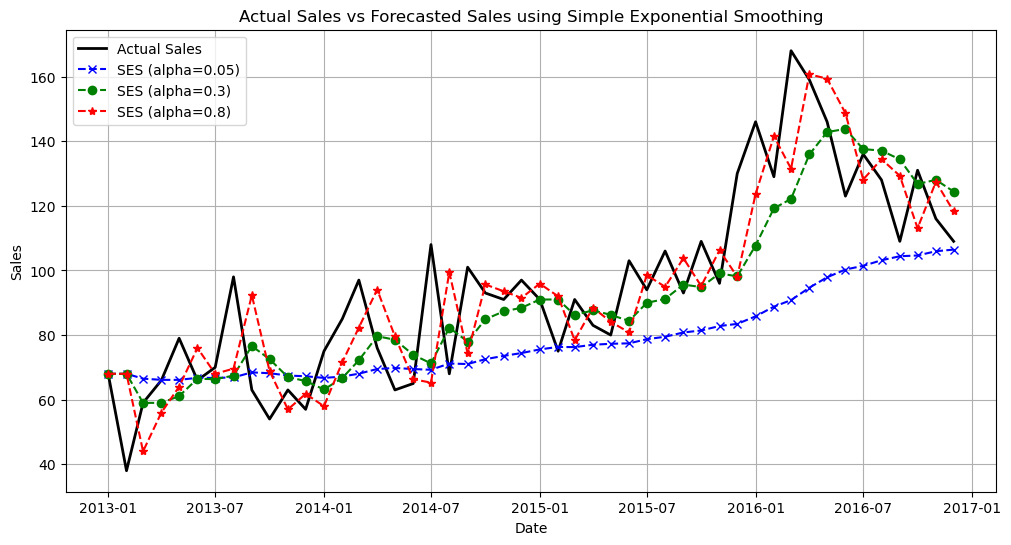

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np

# Load the dataset (make sure 'CS5-train.csv' is in the same directory)
data = pd.read_csv('CS5-train.csv', header=0, index_col=0, parse_dates=True)

# Filter data for Store 1 and Automotive family, aggregate monthly, and set date format.
selected_store_product = data[(data['store_nbr'] == 1) & (data['family'] == 'AUTOMOTIVE')]
selected_store_product['date'] = pd.to_datetime(selected_store_product['date'])
selected_store_product['year_month'] = selected_store_product['date'].dt.to_period('M')
monthly_sales = selected_store_product.groupby('year_month')['sales'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Filtering data for the period from 2013-01-01 to 2016-12-31 for training
filtered_df = monthly_sales[(monthly_sales['year_month'] >= '2013-01-01') & (monthly_sales['year_month'] <= '2016-12-31')]
filtered_df.set_index('year_month', inplace=True)

# Applying Simple Exponential Smoothing (SES) with alpha levels 0.05, 0.3, and 0.8
ses_005 = SimpleExpSmoothing(filtered_df['sales']).fit(smoothing_level=0.05, optimized=False)
ses_03 = SimpleExpSmoothing(filtered_df['sales']).fit(smoothing_level=0.3, optimized=False)
ses_08 = SimpleExpSmoothing(filtered_df['sales']).fit(smoothing_level=0.8, optimized=False)

# Adding forecasts to DataFrame
filtered_df['SES_0.05'] = ses_005.fittedvalues
filtered_df['SES_0.3'] = ses_03.fittedvalues
filtered_df['SES_0.8'] = ses_08.fittedvalues

# Calculating Mean Absolute Deviation (MAD) for each alpha
mad_005 = np.mean(np.abs(filtered_df['sales'] - filtered_df['SES_0.05']))
mad_03 = np.mean(np.abs(filtered_df['sales'] - filtered_df['SES_0.3']))
mad_08 = np.mean(np.abs(filtered_df['sales'] - filtered_df['SES_0.8']))

# Display MAD values
print(f"MAD for SES (alpha=0.05): {mad_005:.2f}")
print(f"MAD for SES (alpha=0.3): {mad_03:.2f}")
print(f"MAD for SES (alpha=0.8): {mad_08:.2f}")

# Plotting actual sales and SES forecasts with different alphas
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['sales'], label='Actual Sales', color='black', linewidth=2)
plt.plot(filtered_df['SES_0.05'], label='SES (alpha=0.05)', linestyle='--', color='blue', marker='x')
plt.plot(filtered_df['SES_0.3'], label='SES (alpha=0.3)', linestyle='--', color='green', marker='o')
plt.plot(filtered_df['SES_0.8'], label='SES (alpha=0.8)', linestyle='--', color='red', marker='*')

# Adding plot labels and legend
plt.title('Actual Sales vs Forecasted Sales using Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()


/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/2311001545.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('CS5-train.csv', header=0, index_col=0, parse_dates=True)


MAD for Holt-Winters Exponential Smoothing: 11.84


/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/2311001545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_store_product['date'] = pd.to_datetime(selected_store_product['date'])
/var/folders/mw/0v88h6rx1gxgyzhg6bq9x5wc0000gn/T/ipykernel_2534/2311001545.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_store_product['year_month'] = selected_store_product['date'].dt.to_period('M')
/Users/mittapallymahendhar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/t

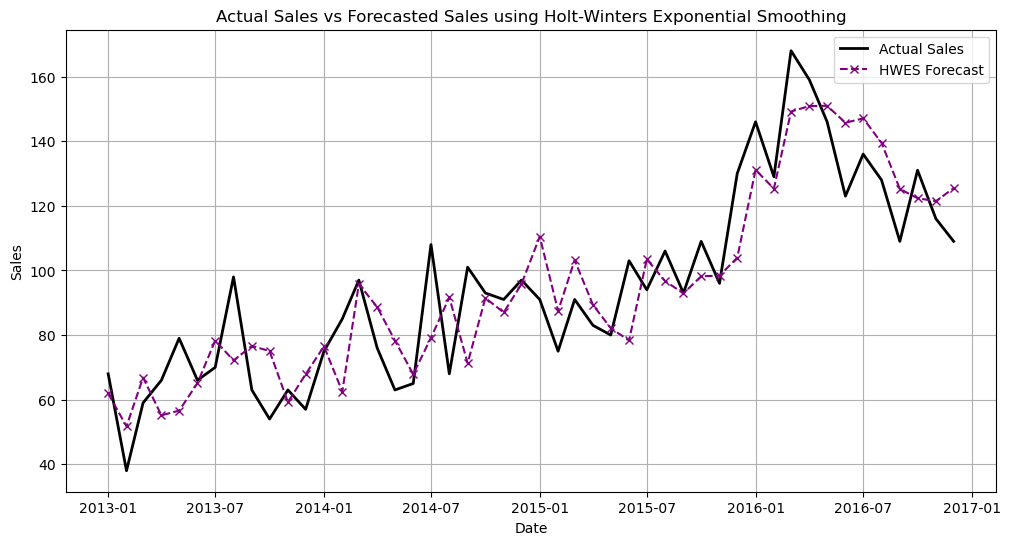

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Load the dataset (ensure 'CS5-train.csv' is in the same directory)
data = pd.read_csv('CS5-train.csv', header=0, index_col=0, parse_dates=True)

# Filter data for Store 1 and Automotive family, aggregate monthly, and set date format
selected_store_product = data[(data['store_nbr'] == 1) & (data['family'] == 'AUTOMOTIVE')]
selected_store_product['date'] = pd.to_datetime(selected_store_product['date'])
selected_store_product['year_month'] = selected_store_product['date'].dt.to_period('M')
monthly_sales = selected_store_product.groupby('year_month')['sales'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Filter data for the period from 2013-01-01 to 2016-12-31 for training
filtered_df = monthly_sales[(monthly_sales['year_month'] >= '2013-01-01') & (monthly_sales['year_month'] <= '2016-12-31')]
filtered_df.set_index('year_month', inplace=True)

# Apply Holt-Winters Exponential Smoothing with additive trend and seasonality
hw_model = ExponentialSmoothing(filtered_df['sales'], trend="add", seasonal="add", seasonal_periods=12)
hw_fit = hw_model.fit()

# Add HWES fitted values to the DataFrame
filtered_df['HWES'] = hw_fit.fittedvalues

# Calculate Mean Absolute Deviation (MAD) for HWES
mad_hw = np.mean(np.abs(filtered_df['sales'] - filtered_df['HWES']))

# Display MAD value for HWES
print(f"MAD for Holt-Winters Exponential Smoothing: {mad_hw:.2f}")

# Plotting actual sales and HWES forecast
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['sales'], label='Actual Sales', color='black', linewidth=2)
plt.plot(filtered_df['HWES'], label='HWES Forecast', linestyle='--', color='purple', marker='x')

# Adding plot labels and legend
plt.title('Actual Sales vs Forecasted Sales using Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()
